<a href="https://colab.research.google.com/github/SeungHyunKee/Python/blob/main/%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98_%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98_%EC%98%88%EC%A0%9Csh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
print(keras.__version__)  # 케라스를 사용할 수 있는지 버전을 출력하여 확인

2.10.0


In [2]:
from keras.datasets import imdb # 리뷰 단어를 보고 긍정적 부정적 두가지로 분류하는 데이터셋
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)  
# 데이터중 자주 사용되는 만개 단어만 사용

In [3]:
train_data.shape  # 데이터의 구조 확인 : 25000개의 값이 1차원데이터로 있음을 알수있다

(25000,)

In [4]:
train_data[0] 

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]    # 긍정은 1 부정은 0

1

In [6]:
# 결과는 0 아님 1이므로 이진분류예제이다 -> sigmoid함수 사용

word_index = imdb.get_word_index() # 단어와 정수를 매핑한 딕셔너리를 리턴
word_index.items()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())  # 키값과 value값의 바꿔준다

In [7]:
# 디코딩 하기
# 숫자로 되어있는걸 문자로 변환해서 보는것
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
#  i-3 = 0, 1, 2는 'padding', '문서 시작', '사전에 없음'을 위한 인덱스이기 때문
# 없는문자(0,1,2, 즉 음수값)는 ? 로 치환

# 0번에있는 첫번째 데이터만 뒤집어봄
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
type(reverse_word_index)

dict

In [9]:
# one hot encoding
# - 방법 :  배열을 만든다 -> 전부 0으로 채워넣고 -> 해당값만 1로 치환시킴

# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):   # 디폴트값을 10000 으로 설정해준것
# sequences 에는 문자 25000개가 들어옴

  results = np.zeros((len(sequences),dimension))  # 배열 만들고 0으로 채워주기
  # len(sequences) = 25000, dimension = 10000  -> (세로)25000 * (가로)10000 배열이 생성됨

  for i, sequence in enumerate(sequences):  # enumerate =  index 만들때 사용될수있음(아래 예제 참고)
    results[i][sequence] = 1   # 해당 단어가 있는 자리에 1을 넣음

  return results

# Data 의 encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [10]:
# enumerate 예제

for i, c in enumerate(['A', 'B', 'C']):  # index번호는 i에, ABC 값은 c 에 들어감
  print(i, c)

for i, c in enumerate(['A', 'B', 'C'], start = 1 ):  # 1부터 시작하고싶을때
 print(i, c)

0 A
1 B
2 C
1 A
2 B
3 C


In [11]:
# enumerate 예제

temp =  enumerate(['A', 'B', 'C'])
type(temp)  # -> 결과 : enumerate
list(temp)  # -> 결과 : 리스트로 변형됨 -- [(0, 'A'), (1, 'B'), (2, 'C')] 튜플형태

[(0, 'A'), (1, 'B'), (2, 'C')]

In [12]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [13]:
# float type으로 변환 (방향은 정수형은 표현불가능하므로 실수로 모두 변환을 해줘야함)
# 라벨들을 모두 float 타입으로 변환해준다

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
# 신경망의 구축
# unit = 세포의 개수(그림에서)
# 출력하는 units = 1개 (출력값이 1개만 나오므로)

from keras import models
from keras import layers

# 망을 구성하기
# model / network 두가지이름이 가장 많이 쓰임. 여기선 models 사용
model = models.Sequential() 

# 첫번째 신경망 추가
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))  # 1000개 짜리 데이터가 신경망에 쏟아져들어옴

# 두번째 신경망 추가
model.add(layers.Dense(16, activation='relu'))

# 마지막 신경망
model.add(layers.Dense(1, activation='sigmoid'))  # 출력의 결과를 분명하게 보이게 하기위해 sigmoid 함수 사용

In [15]:
# 모델 컴파일하기

from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),   # RMSprop(lr=0.001) : 제약 걸어주는것, 너무 과하게 학습하는것을 제한
              loss='binary_crossentropy',  # 이진분류 문제이므로 loss 손실함수 사용 
              metrics=['accuracy'])

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
# 데이터 조금더 쪼개보기

x_val = x_train[:10000]  # 테스트용 데이터 25000개 중, 앞부분의 10000개 가져옴
partial_x_train = x_train[10000:]  # 조각 partial이라고 이름지어줌

y_val = y_train[:10000]  # 라벨데이터도 10000개 가지고옴
partial_y_train = y_train[10000:]  

# 총 25000 * 10000 개의 학습데이터중, x_val 처음부터10000개, 그리고 partial_x_train 에 나머지 값들(15000개) 로 쪼개놓음
# 이렇게하는이유 : 학습(150000개)과 동시에 10000개의 검증용 데이터(x_val)로 검증을 하기 위함 -> 그다음 test 데이터 투입해서 한번더 검증함
# == 데이터셋이 validation, train, test 3가지로 나눠지는게 가상 이상적

In [17]:
history = model.fit(partial_x_train, # 학습용데이터
                    partial_y_train, # 학습용라벨데이터
                    epochs=20,       # 20번 반복
                    batch_size=512,
                    validation_data=(x_val, y_val))

# history 는 epoch마다 accuracy와 val_loss값들이 저장된 변수

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5231 - accuracy: 0.7761 - val_loss: 0.4037 - val_accuracy: 0.8596
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3145 - accuracy: 0.8999 - val_loss: 0.3106 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2296 - accuracy: 0.9261 - val_loss: 0.2915 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1825 - accuracy: 0.9418 - val_loss: 0.2779 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1507 - accuracy: 0.9508 - val_loss: 0.2756 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1234 - accuracy: 0.9612 - val_loss: 0.3928 - val_accuracy: 0.8554
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1024 - accuracy: 0.9705 - val_loss: 0.3028 - val_accuracy: 0.8840
Epoch 8/20
30

In [18]:
# 실험 결과 데이터를 가져온다. 시각적으로 표현하기

acc = history.history['accuracy']  
val_acc = history.history['val_accuracy']  
loss = history.history['loss']
val_loss = history.history['val_loss']
# 반복횟수 가지고옴
epochs = range(1, len(acc)+1)   # 1부터 시작 ~ 전체데이터개수 + 1

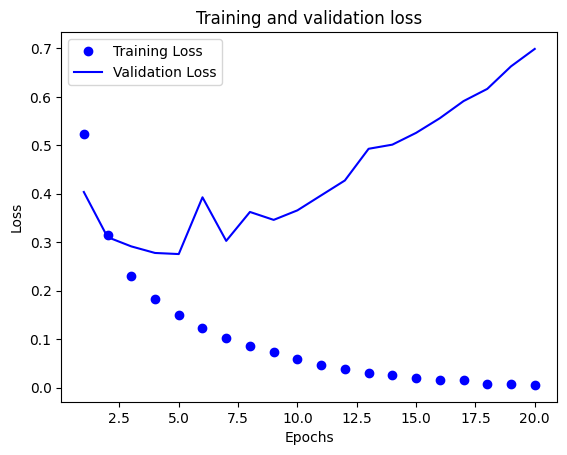

In [19]:
# 실험 결과를 시각화 한다. 
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training Loss') # y축에 소실값넣음, 학습정확도
# 그래프보면 epochs 증가할수록 loss감소하는데, 이는 해당 데이터에서만 좋은 결과값임.

plt.plot(epochs, val_loss,'b-', label='Validation Loss') # 검증정확도 를 보는게 중요!
plt.title('Training and validation loss')
plt.xlabel('Epochs') # 반복횟수
plt.ylabel('Loss') # 손실값
plt.legend() # 각주가 보이게 하기위함

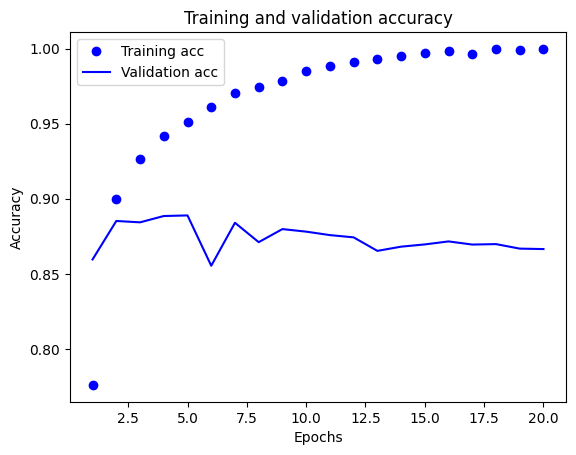

In [20]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 아래는 정확도를 기준으로 보는 차트 
#  2.8 정도 (3번째)정도가 가장 값 잘나온다 = 3번만 epochs 돌리기

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=256, 
                    validation_data=(x_val, y_val))

Epoch 1/3
59/59 [==============================] - 1s 15ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 0.7745 - val_accuracy: 0.8644
Epoch 2/3
59/59 [==============================] - 1s 11ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.8180 - val_accuracy: 0.8656
Epoch 3/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.8984 - val_accuracy: 0.8642
